# Choosing days for cross validatiion 

Timeseries forecasting is different from traditional machine learniing in that in cross-validation, sequence matters.  In the data provided, each observation occurs every 30 minutes.  This means there is a diffrence between forecastiing the next observation and the next day of observations (24 hours, 48 observations).  In this notebook, we describe one way of choosing the correct test sets for cross validation.

First, we read in the DFW demand data.

In [2]:
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("../test/data/dfw_demand.csv.gz")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['time'] = df.index.time
df.shape

(48141, 15)

We focus on the last 100 days, but any range at the end of the data would work also.

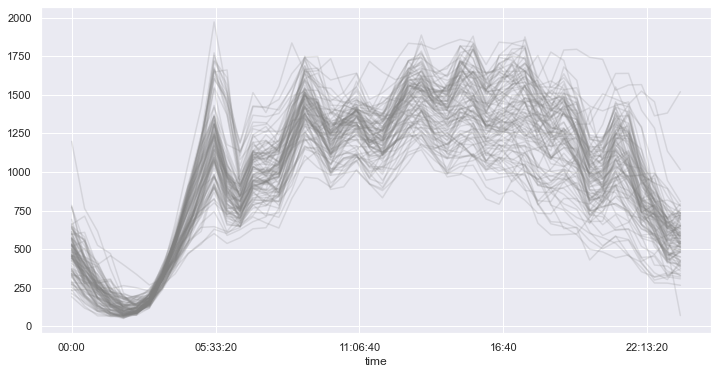

In [4]:
tmp = df.tail(100*48)

piv = (tmp
         .pivot_table(index='time', columns=['year', 'month', 'day'], values=['vehicles'], aggfunc='sum'))
ax = piv.plot(legend=False, alpha=0.2, color='grey', figsize=(12,6))

We can sum over the entire day to estimate total demand, and then pick values that fall in the median, the bottom 20% and the top 80%.  Other strategies will work also.

<AxesSubplot:xlabel='time'>

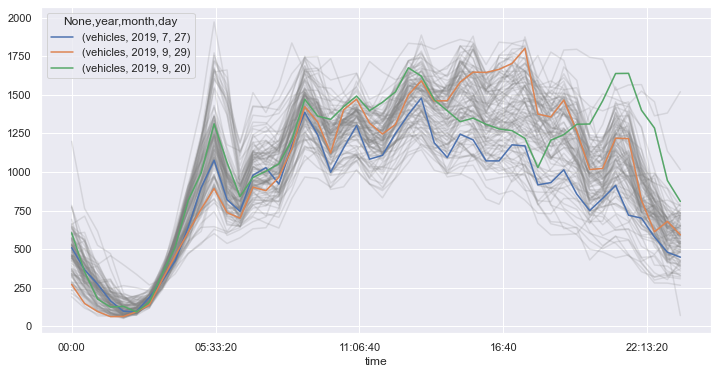

In [5]:
ordered = piv.sum().sort_values()
pickers = [0.2, 0.5, 0.8]
values = [ ordered.reset_index().iloc[ int(x*(len(ordered)-1)),].values[:-1] for x in pickers]

ax = piv.plot(legend=False, alpha=0.2, color='grey', figsize=(12,6))
piv[[ (x[0], x[1], x[2], x[3]) for x in values ]].plot(ax=ax)

These three days represent reasonable test days for cross validation.

In [6]:
[ "{0:04d}-{1:02d}-{2:02d} 00:00:00".format(x[1], x[2], x[3]) for x in values ]

['2019-07-27 00:00:00', '2019-09-29 00:00:00', '2019-09-20 00:00:00']